In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
#read dataset
data=pd.read_excel(r"C:\Users\user\Desktop\iris.xls")

In [3]:
#printing first five rows
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#dataset statistical description 
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.shape

(150, 5)

In [7]:
#Handling missing values
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
mean_val = np.mean(data)
data.fillna(mean_val, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [9]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [10]:
#Checking for duplicates
dupli_val = data.duplicated()
dupli_val.sum()

3

In [11]:
#removing duplicates
data = data.drop_duplicates()

In [12]:
data.shape

(147, 5)

In [13]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

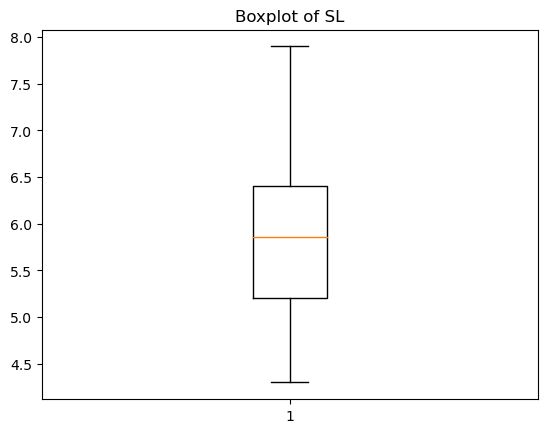

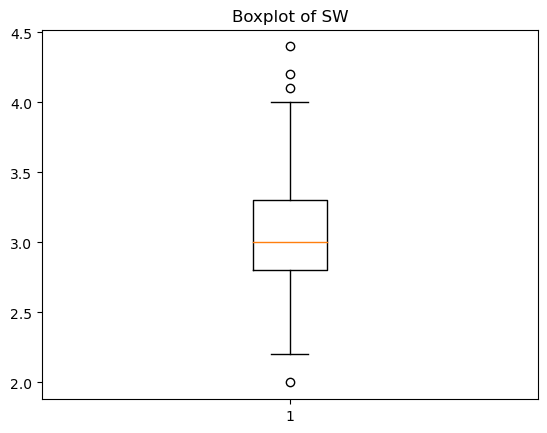

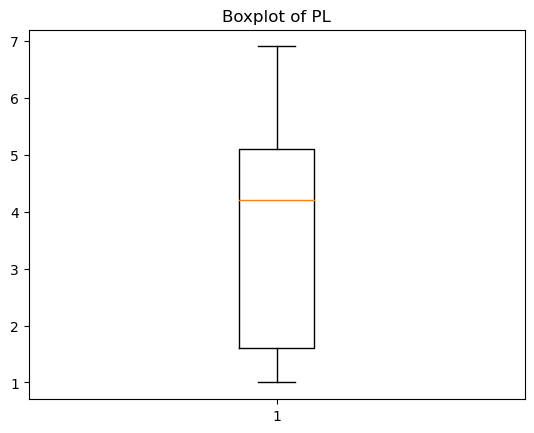

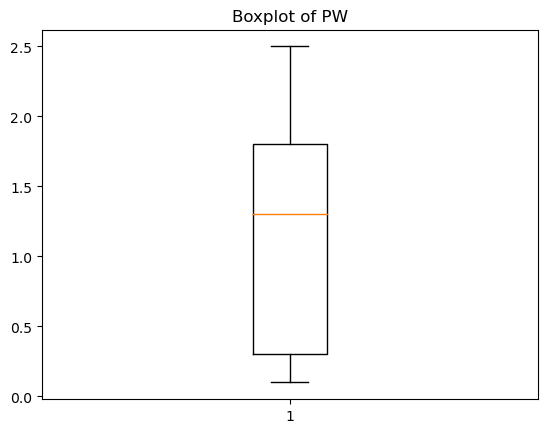

In [14]:
#Outlier handling
cols = ['SL', 'SW', 'PL', 'PW']
for col in cols:
    plt.figure()
    plt.boxplot(data[col])
    plt.title('Boxplot of {}'.format(col))
    plt.show()


In [15]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
print(low_lim)
print(upp_lim)

2.05
4.05


In [16]:
outlier=[]
for x in data['SW']:
    if((x>upp_lim) or (x<low_lim)):
        outlier.append(x)

In [17]:
outlier

[4.4, 4.1, 4.2, 2.0]

In [18]:
data['SW']=np.where(data['SW']>upp_lim,upp_lim,np.where(data['SW']<low_lim,low_lim,data['SW']))

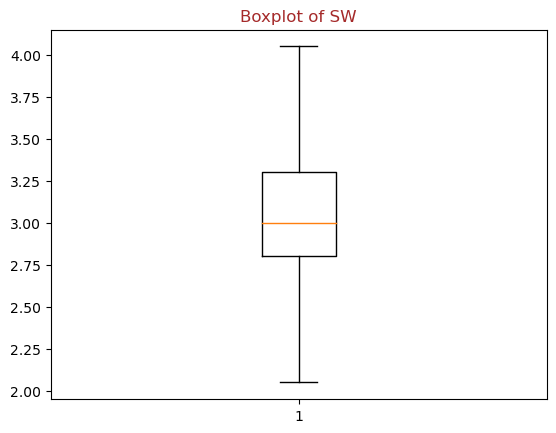

In [19]:
plt.figure()
plt.boxplot(data['SW'])
plt.title('Boxplot of SW', color = 'brown')
plt.show()

In [20]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
iris=data.drop('Classification', axis=1)

In [22]:
iris.head()

,SL,SW,PL,PW
0,5.100000,3.5,1.4,0.2
1,4.900000,3.0,1.4,0.2
2,5.855944,3.2,1.3,0.2
3,4.600000,3.1,1.5,0.2
4,5.000000,3.6,1.4,0.2


In [23]:
iris=scaler.fit_transform(iris)
type(iris)

numpy.ndarray

In [24]:
iris = pd.DataFrame(iris, columns=['SL', 'SW', 'PL', 'PW'])

In [25]:
iris.describe()

,SL,SW,PL,PW
count,1.470000e+02,1.470000e+02,1.470000e+02,1.470000e+02
mean,-5.049343e-16,3.222101e-16,-1.034698e-15,-3.572350e-16
std,1.003419e+00,1.003419e+00,1.003419e+00,1.003419e+00
min,-1.946665e+00,-2.417016e+00,-1.621214e+00,-1.468099e+00
25%,-8.302663e-01,-5.998761e-01,-1.271036e+00,-1.203301e+00
50%,-1.660533e-02,-1.153053e-01,2.464055e-01,1.206904e-01
75%,6.582649e-01,6.115508e-01,7.716737e-01,7.826860e-01
max,2.518929e+00,2.428691e+00,1.822210e+00,1.709480e+00


In [26]:
#Encoding categorical variables
le=LabelEncoder()
iris['Classification']=le.fit_transform(data['Classification'])

In [27]:
iris.head()

,SL,SW,PL,PW,Classification
0,-0.954311,1.096122,-1.387762,-1.3357,0
1,-1.202399,-0.115305,-1.387762,-1.3357,0
2,-0.016605,0.369265,-1.446125,-1.3357,0
3,-1.574532,0.126980,-1.329399,-1.3357,0
4,-1.078355,1.338407,-1.387762,-1.3357,0


In [28]:
iris["Classification"].unique()

array([0, 1, 2])

In [29]:
iris['Classification'].value_counts()

1    50
2    49
0    48
Name: Classification, dtype: int64

In [30]:
#Model Evaluation
y = iris['Classification']
X = iris.drop('Classification', axis=1)

In [31]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

### Logistic Regression

In [32]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_pred_lr = lr_model.predict(X_test)

In [34]:

print('Accuracy is: ',round(accuracy_score(y_test,y_pred_lr),2))
print('Precision is: ',round(precision_score(y_test,y_pred_lr,average='micro'),2))
print('Recall score is: ',round(recall_score(y_test,y_pred_lr,average='micro'),2))
print('f1 score is: ',round(f1_score(y_test,y_pred_lr,average='micro'),2))

Accuracy is:  0.96
Precision is:  0.96
Recall score is:  0.96
f1 score is:  0.96


In [35]:
confusion_matrix(y_test,y_pred_lr)

array([[9, 0, 0],
       [0, 6, 1],
       [0, 0, 7]], dtype=int64)

### Decision Tree

In [36]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
y_pred_dt  = dt_model.predict(X_test)

In [38]:
print('accuracy is: ',round(accuracy_score(y_test,y_pred_dt),2))
print('Precision is: ',round(precision_score(y_test,y_pred_dt,average='micro'),2))
print('recall score is: ',round(recall_score(y_test,y_pred_dt,average='micro'),2))
print('f1 score is: ',round(f1_score(y_test,y_pred_dt,average='micro'),2))

accuracy is:  0.91
Precision is:  0.91
recall score is:  0.91
f1 score is:  0.91


In [39]:
confusion_matrix(y_test,y_pred_dt)

array([[9, 0, 0],
       [0, 6, 1],
       [0, 1, 6]], dtype=int64)

### KNN

In [40]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
print('accuracy is: ',round(accuracy_score(y_test,y_pred_knn),2))
print('Precision is: ',round(precision_score(y_test,y_pred_knn,average='micro'),2))
print('recall score is: ',round(recall_score(y_test,y_pred_knn,average='micro'),2))
print('f1 score is: ',round(f1_score(y_test,y_pred_knn,average='micro'),2))

accuracy is:  0.96
Precision is:  0.96
recall score is:  0.96
f1 score is:  0.96


In [42]:
confusion_matrix(y_test,y_pred_knn)

array([[9, 0, 0],
       [0, 6, 1],
       [0, 0, 7]], dtype=int64)

### Support Vector Machine 

In [43]:
svm_model=SVC(kernel="linear")
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [44]:
y_pred_svm = dt_model.predict(X_test)

In [45]:
print('accuracy is: ',round(accuracy_score(y_test,y_pred_svm),2))
print('Precision is: ',round(precision_score(y_test,y_pred_svm,average='micro'),2))
print('recall score is: ',round(recall_score(y_test,y_pred_svm,average='micro'),2))
print('f1 score is: ',round(f1_score(y_test,y_pred_svm,average='micro'),2))

accuracy is:  0.91
Precision is:  0.91
recall score is:  0.91
f1 score is:  0.91


In [46]:
print(confusion_matrix(y_test,y_pred_svm))

[[9 0 0]
 [0 6 1]
 [0 1 6]]


### Random Forest

In [47]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
y_pred_rf=rf.predict(X_test)

In [49]:
print('accuracy is: ',round(accuracy_score(y_test,y_pred_rf),2))
print('Precision is: ',round(precision_score(y_test,y_pred_rf,average='micro'),2))
print('recall score is: ',round(recall_score(y_test,y_pred_rf,average='micro'),2))
print('f1 score is: ',round(f1_score(y_test,y_pred_rf,average='micro'),2))

accuracy is:  0.91
Precision is:  0.91
recall score is:  0.91
f1 score is:  0.91


In [50]:
confusion_matrix(y_test,y_pred_rf)

array([[9, 0, 0],
       [0, 6, 1],
       [0, 1, 6]], dtype=int64)

In [51]:
res=pd.DataFrame({
    'Models':['Logistic Regression','Support Vector Machines' ,'KNN','Decision Tree','Random Forest'],
    'Score': [round(accuracy_score(y_test,y_pred_lr),2),round(accuracy_score(y_test,y_pred_svm),2),
              round(accuracy_score(y_test,y_pred_knn),2),round(accuracy_score(y_test,y_pred_dt),2),
              round(accuracy_score(y_test,y_pred_rf),2)]
})

In [52]:
result_df = res.sort_values(by='Score', ascending=False)

In [53]:
result_df

,Models,Score
0,Logistic Regression,0.96
2,KNN,0.96
1,Support Vector Machines,0.91
3,Decision Tree,0.91
4,Random Forest,0.91


### Insight:

Based on the accuracy scores, it can be clearly stated that Logistic Regression	and  KNN are the best model when compared to other models. While both has a score of 0.96 all others have a score of 0.91.